In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd

In [ ]:
url_lieux_vaccination = "https://www.data.gouv.fr/api/1/datasets/r/479afe3e-a2aa-4519-b509-ba9c106a5576"
lieux_vaccination_df = pd.read_csv(url_lieux_vaccination, sep=";")

In [ ]:
url_departements_geojson = "https://france-geojson.gregoiredavid.fr/repo/departements.geojson"
departements_gdf = gpd.read_file(url_departements_geojson)

In [ ]:
# compte le nombre de pharmacies par département et merge avec le GeoDataFrame.
lieux_vaccination_df['Adresse_codepostal_str'] = lieux_vaccination_df['Adresse_codepostal'].astype(str).str.zfill(5)
lieux_vaccination_df['departement_code'] = lieux_vaccination_df['Adresse_codepostal_str'].str[:2]

pharmacy_counts = lieux_vaccination_df['departement_code'].value_counts().reset_index()
pharmacy_counts.columns = ['code', 'pharmacy_count']

merged_gdf = departements.merge(pharmacy_counts, left_on='code', right_on='code', how='left')
merged_gdf['pharmacy_count'] = merged_gdf['pharmacy_count'].fillna(0).astype(int)

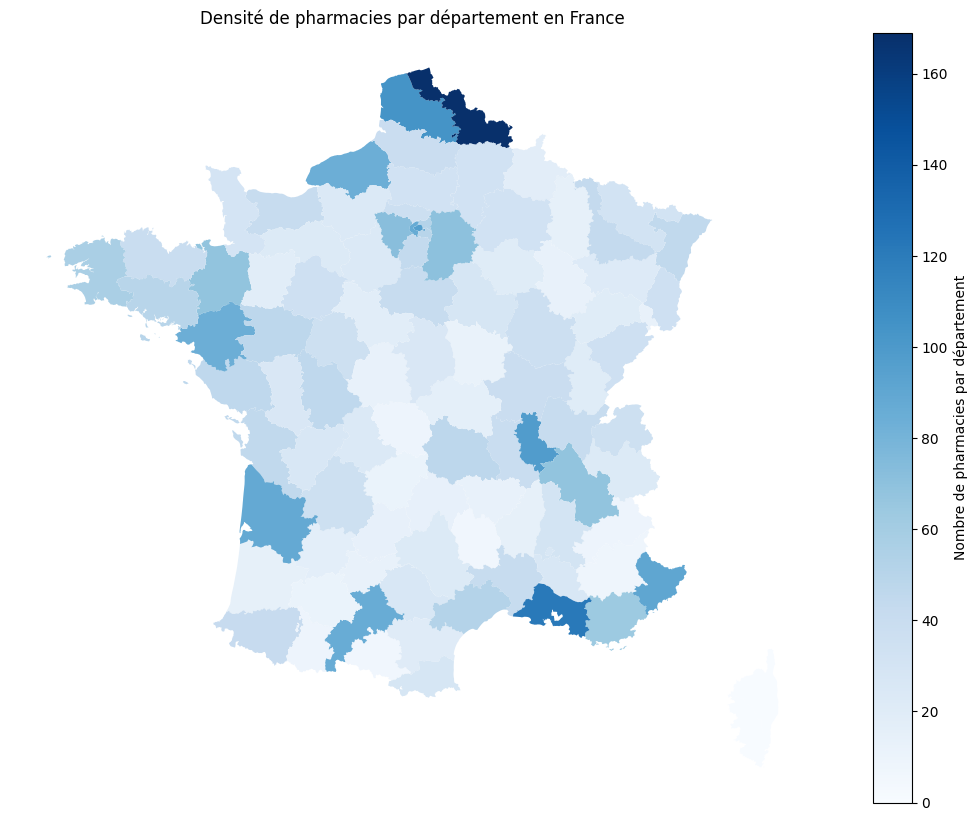

In [ ]:

fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged_gdf.plot(column='pharmacy_count', ax=ax, legend=True, cmap='Blues',
                legend_kwds={'label': "Nombre de pharmacies par département",
                             'orientation': "vertical"})
ax.set_title("Densité de pharmacies par département en France")
ax.set_axis_off()
plt.show()